This assigment has the purpose of solving the maximazition problem for given parameters. 

We firstly import the relevant packages, that are relevant for the execution of the following assignment. 

In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
from matplotlib import cm # for colormaps

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

1) solving equation 1

In [2]:
# defining parameters
w = 1
m = 1 
v = 10 

tau0 = 0.4 
tau1 = 0.1 
kappa = 0.4
epsilon = 0.3 

First and foremost, we define the utility and budget constraint fot the given parameteres. 

In [3]:
def utility(c,l): 
    u = np.log(c)-v*l**(1+1/epsilon)/(1+1/epsilon)
    return u 

def budget(l,w):
    constraint = m + w*l-[tau0*w*l+tau1*np.fmax(w*l-kappa,0)]
    return constraint

def equality(l,w):
    c = budget(l,w)
    return -utility(c,l)

We are now interested in optimize "equality"

In [4]:
opt = optimize.minimize_scalar(equality,bounds=(0,1),args=(w),method="bounded")
print(opt.message)
l_opt = opt.x
c_opt = budget(l_opt,w)
utility_opt = utility(c_opt,l_opt)

Solution found.


The optimal values for consumption, labour and utility is respectively, 1.24, 0.40 and 0.17

2) Plot l_opt and c_opt in the range 0.5 to 1.5

In [5]:
m = 1
v = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

N=10000
w_ = np.linspace(0.5,1.5,N)
l_ = np.empty(N)
c_ = np.empty(N)



for j,w in enumerate(w_):
    opt = optimize.minimize_scalar(equality,bounds=(0,1),args=(w),method="bounded")
    l_[j] = opt.x
    c_[j] = budget(l_[j],w)

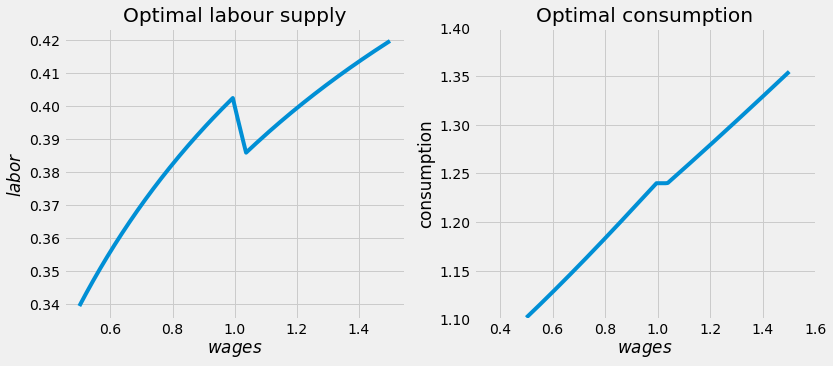

In [6]:
#We can now illustrate the plot. In the following code, we specify the colours and grid formats. 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,5))

#The first plot: Labor as a function of wage
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_,l_)

#setting the title and labbeling the axis. 
ax_left.set_title('Optimal labour supply')
ax_left.set_xlabel('$wages$')
ax_left.set_ylabel('$labor$')
ax_left.grid(True)

#The second plot: consumption as a function of wage
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_, c_)

#setting the title and labbeling the axis. 
ax_right.set_title('Optimal consumption')
ax_right.set_xlabel('$wages$')
ax_right.set_ylabel('consumption')
ax_right.grid(True)
plt.ylim((1.10,1.4))
plt.xlim((0.3,1.6))

plt.show()

The optimal labor and consumption have dips around $w=1$ which happens as a result to when the extra tax from $\tau_1$ hits the consumer.

3) Calculation of the tax revenue

We consider a popultion of N=10.000 indexed by i. We assume that a given wage sample are uniformly distributed.
We define the tax revenue function which is stated in the project description

In [7]:
def taxrevenue(kappa, tau0, tau1, l_,w_):
    revenue = np.sum(tau0*w_*l_ + tau1*np.fmax(w_*l_- kappa,0))
    return revenue 
print(taxrevenue(kappa, tau0, tau1, l_,w_))

1630.1868725628713


Given the parameteres and the earlier calculated values, the tax-revenue is eqaul to 1630.2

4) What is the taxrevenue when $\epsilon$=0.1?

We redefine the values for l and c, given the fact that the value of epsilon has an effect through these variables. 

In [19]:
epsilon=0.1
l_new=np.empty(N)
for j,w in enumerate(w_):
    opt = optimize.minimize_scalar(equality,bounds=(0,1),args=(w),method="bounded")
    l_new[j] = opt.x
    c_[j] = budget(l_[j],w)
print(f'Optimal tax revenue: {taxrevenue(kappa, tau0, tau1, l_new,w_):.2f}')

Optimal tax revenue: 3196.88


For the new value of epsilon, it is evident that the taxrevenue is remarkebly higher. The optimal tax revenue, for the new value of epsilon, is 3196.88.

5) We are interested in applying the same method as done in question 1, just for new values of the parameters. 

In [20]:
def optimal_tax(x):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    w = x[3]
    l = x[4]
    revenue = np.sum(tau0*w*l + tau1*np.fmax(w*l-kappa,0))
    return revenue

def ob(x):
    return -optimal_tax(x)   

In [21]:
def budgetcon_tax(x):
    tau0 = x[2]
    tau1 = x[3]
    kappa = x[4]
    con = m + x[0]*x[1] - (x[2]*x[0]*x[1] + x[3]*np.fmax(x[0]*x[1]-x[4],0))
    return con

In [22]:
def equality_tax(x):
    w = x[0]
    l = x[1]
    c = budgetcon_tax(x)
    return -ob(x)

In [23]:
x0 = [1, 1, 1, 1, 1]
constraint = ({"type":"ineq","fun":budgetcon_tax})
bounds = ((0.5,1.5),(0,1),(0,1),(0,1),(0,1))

tax_opt = minimize(equality_tax, x0, bounds=bounds,constraints=constraint, method='SLSQP')
print(tax_opt.message)
w_optim = tax_opt.x[0]
l_optim = tax_opt.x[1]
tau0_optim = tax_opt.x[2]
tau1_optim = tax_opt.x[3]
kappa_optim = tax_opt.x[4]
c_optim = budgetcon_tax(tax_opt.x)
optimal_tax_utility = utility(c_optim,l_optim)
optimal_taxrevenue = taxrevenue(kappa_optim, tau0_optim, tau1_optim, l_,w_)

Optimization terminated successfully.


In [24]:
print(f'Standard labor income is equal to: {tau0_optim:.2f}')
print(f'Top bracket labor income is equal to: {tau1_optim:.2f}')
print(f'Cut-off for top labor income is equal to: {tau1_optim:.2f}')
print(f'The total tax revenue is equal to: {optimal_taxrevenue:.2f}')

Standard labor income is equal to: 1.00
Top bracket labor income is equal to: 0.00
Cut-off for top labor income is equal to: 0.00
The total tax revenue is equal to: 3943.93


The new result suggests a higher tax revenue, with a value of 3943.93. 